In [1]:
import requests
from config import client_id
from config import client_secret
from formulas import search_song_data, get_playlist_songs, get_track_features, get_spotify_token
import pandas as pd
import scipy.stats as stats

In [2]:
tracks_2010s_df = pd.read_csv("2010_tracks_csv.csv")

In [3]:
tracks_2010s_df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [4]:
tracks_2010s_df = tracks_2010s_df.rename(columns = {'title':'track_name', 'artist':'artist_name','added':'date_added','nrgy':'energy','dnce':'danceability','val':'valence','dur':'duration (secs)','acous':'acousticness','spch':'speechiness','pop':'popularity'})

In [5]:
tracks_2010s_df = tracks_2010s_df.dropna(how='any')

In [6]:
tracks_2010s_df

,track_name,artist_name,top genre,year released,date_added,bpm,energy,danceability,dB,live,valence,duration (secs),acousticness,speechiness,popularity,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo


In [7]:
tracks_2010s_df['duration (ms)'] = tracks_2010s_df['duration (secs)'] * 1000
tracks_2010s_df

,track_name,artist_name,top genre,year released,date_added,bpm,energy,danceability,dB,live,valence,duration (secs),acousticness,speechiness,popularity,top year,artist type,duration (ms)
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo,203000.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo,192000.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo,243000.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo,180000.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo,268000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo,313000.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo,190000.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo,177000.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo,214000.0


In [8]:
tracks_2010s_df['year released'] = tracks_2010s_df['year released'].astype(int)
tracks_2010s_df['top year'] = tracks_2010s_df['top year'].astype(int)
tracks_2010s_df

,track_name,artist_name,top genre,year released,date_added,bpm,energy,danceability,dB,live,valence,duration (secs),acousticness,speechiness,popularity,top year,artist type,duration (ms)
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010,Duo,203000.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010,Duo,192000.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010,Solo,243000.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010,Solo,180000.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010,Solo,268000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019,Solo,313000.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019,Solo,190000.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019,Solo,177000.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019,Duo,214000.0


F_onewayResult(statistic=9.159525009068558, pvalue=2.0680310120606246e-13)

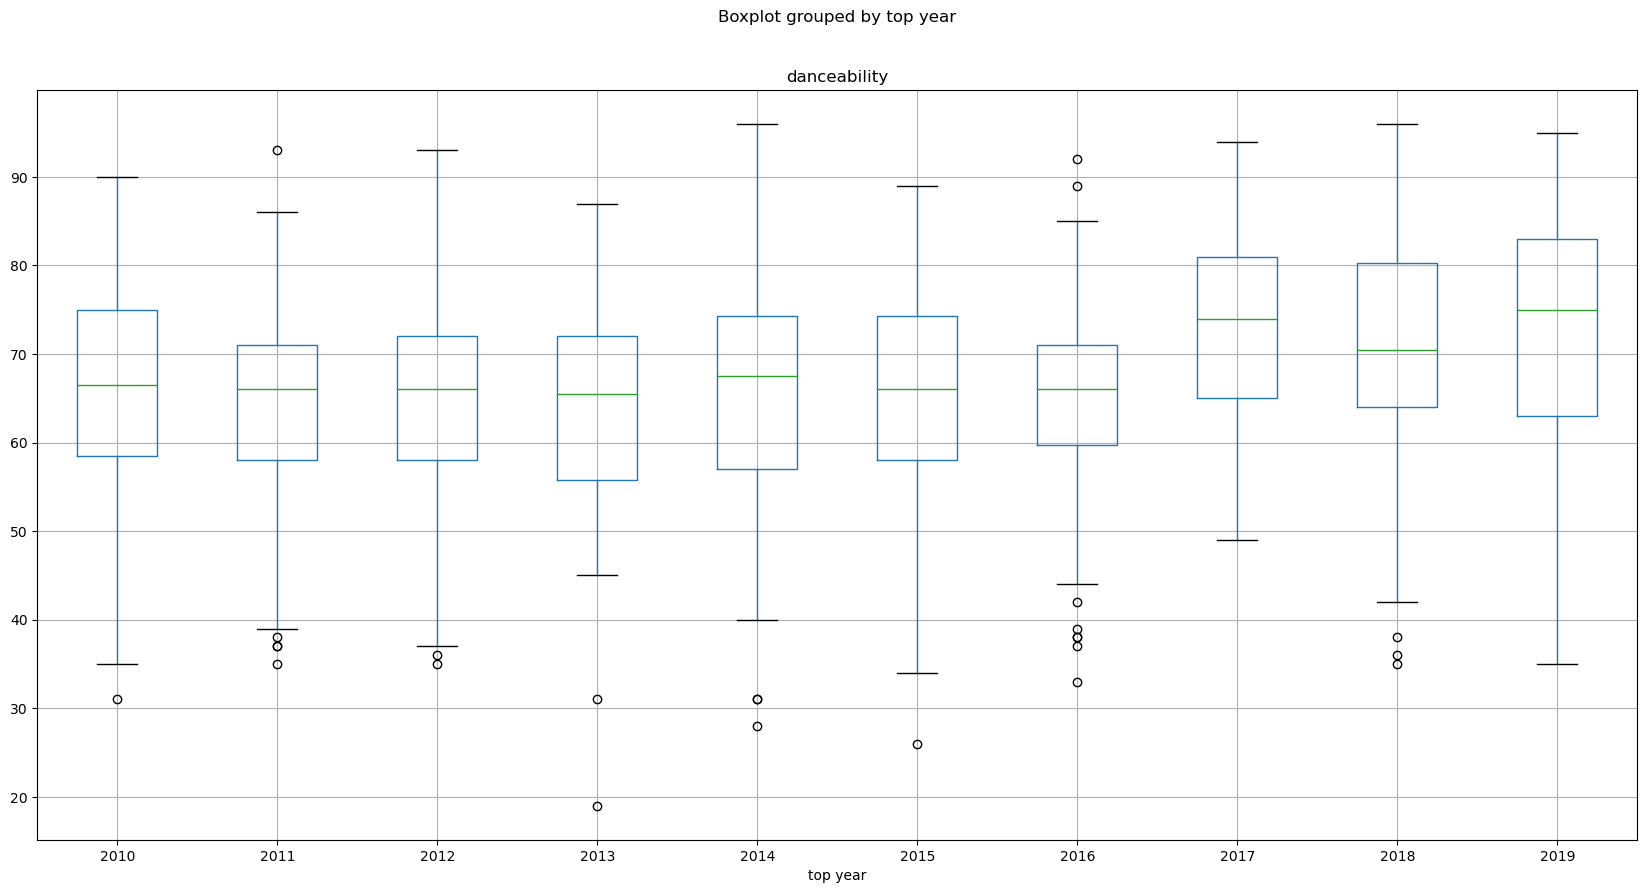

In [20]:
tracks_2010s_df.boxplot("danceability", by="top year", figsize=(20, 10))
group0 = tracks_2010s_df[tracks_2010s_df["top year"] == 2010]["danceability"]
group1 = tracks_2010s_df[tracks_2010s_df["top year"] == 2011]["danceability"]
group2 = tracks_2010s_df[tracks_2010s_df["top year"] == 2012]["danceability"]
group3 = tracks_2010s_df[tracks_2010s_df["top year"] == 2013]["danceability"]
group4 = tracks_2010s_df[tracks_2010s_df["top year"] == 2014]["danceability"]
group5 = tracks_2010s_df[tracks_2010s_df["top year"] == 2015]["danceability"]
group6 = tracks_2010s_df[tracks_2010s_df["top year"] == 2016]["danceability"]
group7 = tracks_2010s_df[tracks_2010s_df["top year"] == 2017]["danceability"]
group8 = tracks_2010s_df[tracks_2010s_df["top year"] == 2018]["danceability"]
group9 = tracks_2010s_df[tracks_2010s_df["top year"] == 2019]["danceability"]
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

In [ ]:
#Assuming a standard cut off at 5%, we can see with this low p-value that there is a statistically relevant correlation between Danceability throughout the 2010s.

F_onewayResult(statistic=1.3730279432217125, pvalue=0.1956487288030303)

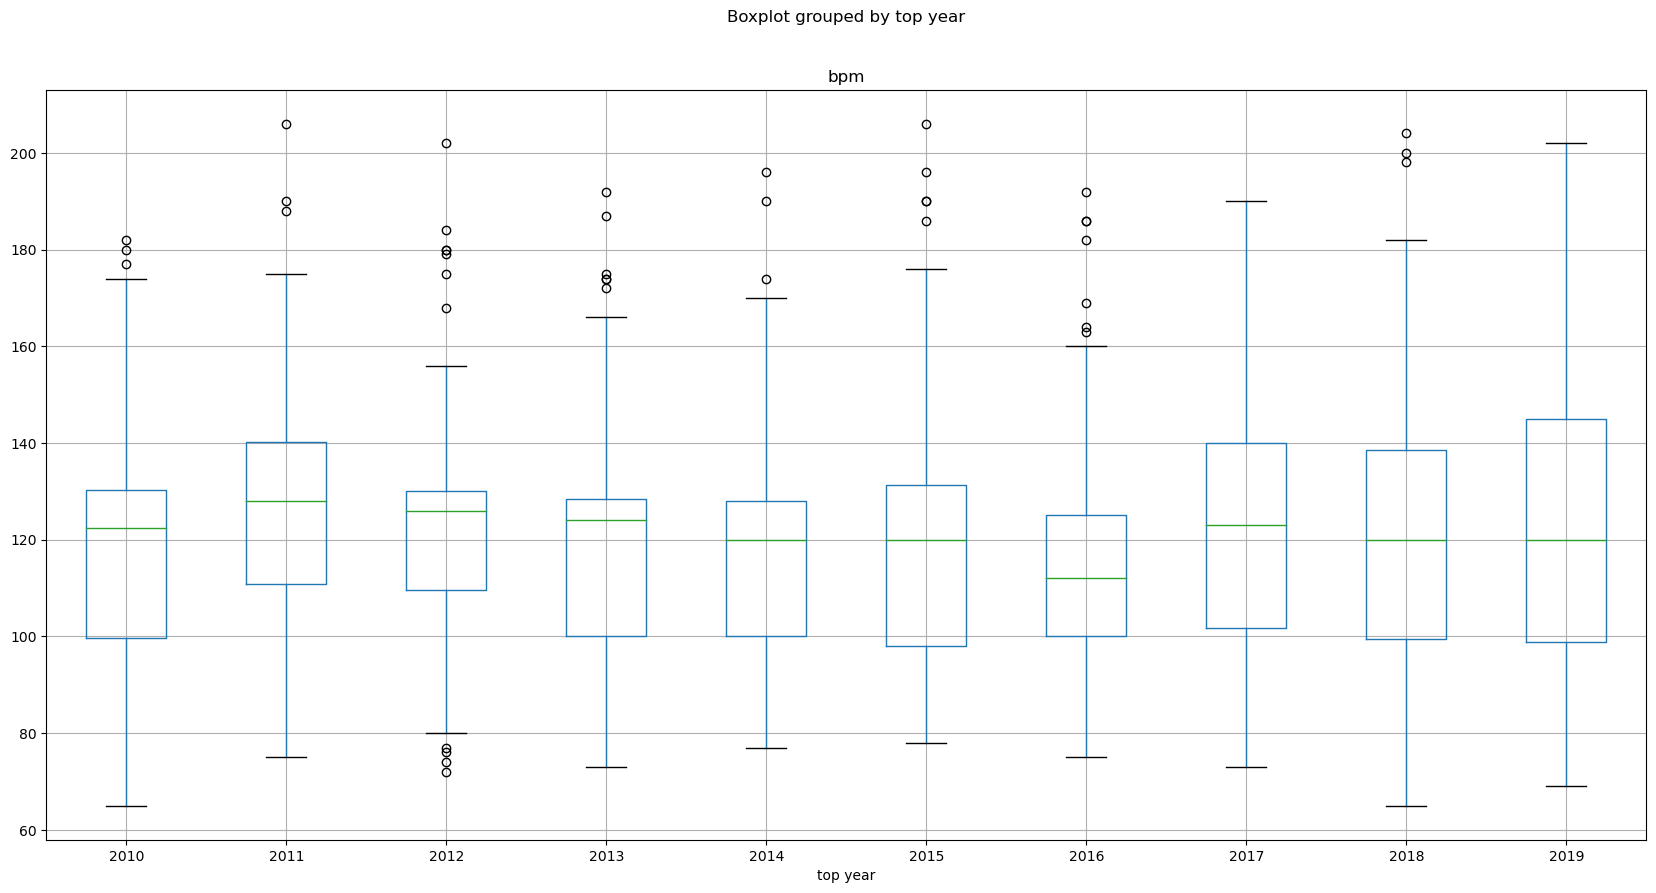

In [18]:
tracks_2010s_df.boxplot("bpm", by="top year", figsize=(20, 10))
group0 = tracks_2010s_df[tracks_2010s_df["top year"] == 2010]["bpm"]
group1 = tracks_2010s_df[tracks_2010s_df["top year"] == 2011]["bpm"]
group2 = tracks_2010s_df[tracks_2010s_df["top year"] == 2012]["bpm"]
group3 = tracks_2010s_df[tracks_2010s_df["top year"] == 2013]["bpm"]
group4 = tracks_2010s_df[tracks_2010s_df["top year"] == 2014]["bpm"]
group5 = tracks_2010s_df[tracks_2010s_df["top year"] == 2015]["bpm"]
group6 = tracks_2010s_df[tracks_2010s_df["top year"] == 2016]["bpm"]
group7 = tracks_2010s_df[tracks_2010s_df["top year"] == 2017]["bpm"]
group8 = tracks_2010s_df[tracks_2010s_df["top year"] == 2018]["bpm"]
group9 = tracks_2010s_df[tracks_2010s_df["top year"] == 2019]["bpm"]
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

In [22]:
#Assuming a standard cut off at 5%, we can see with this ~20% p-value that there is not a statistically relevant correlation between BPM through the years.

F_onewayResult(statistic=11.75621444957869, pvalue=1.045721310469115e-17)

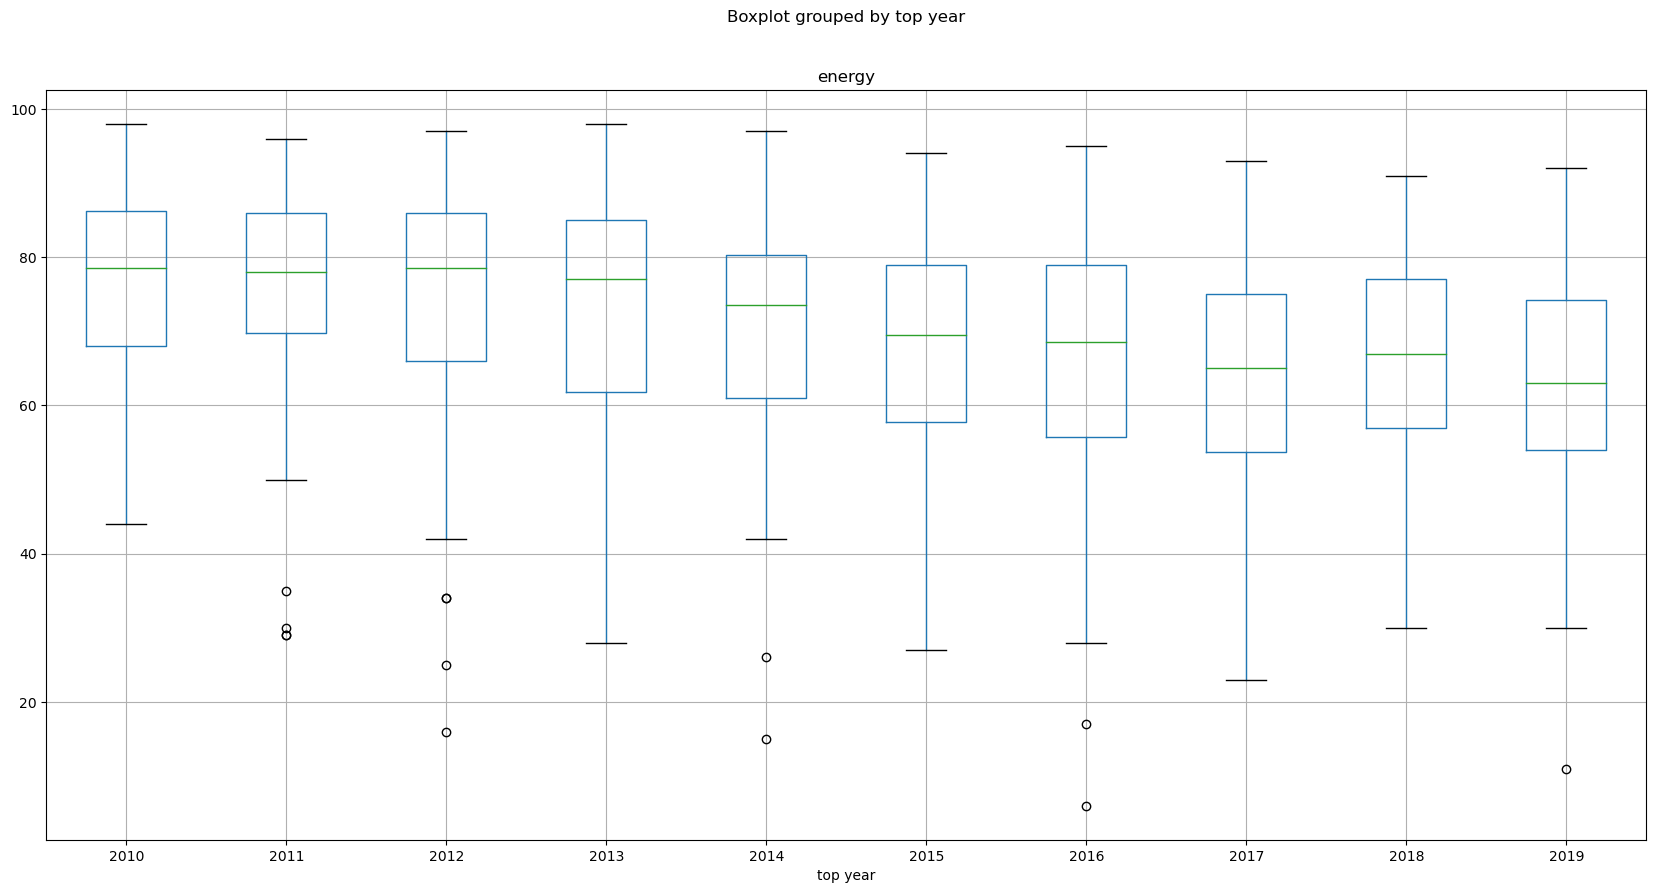

In [23]:
tracks_2010s_df.boxplot("energy", by="top year", figsize=(20, 10))
group0 = tracks_2010s_df[tracks_2010s_df["top year"] == 2010]["energy"]
group1 = tracks_2010s_df[tracks_2010s_df["top year"] == 2011]["energy"]
group2 = tracks_2010s_df[tracks_2010s_df["top year"] == 2012]["energy"]
group3 = tracks_2010s_df[tracks_2010s_df["top year"] == 2013]["energy"]
group4 = tracks_2010s_df[tracks_2010s_df["top year"] == 2014]["energy"]
group5 = tracks_2010s_df[tracks_2010s_df["top year"] == 2015]["energy"]
group6 = tracks_2010s_df[tracks_2010s_df["top year"] == 2016]["energy"]
group7 = tracks_2010s_df[tracks_2010s_df["top year"] == 2017]["energy"]
group8 = tracks_2010s_df[tracks_2010s_df["top year"] == 2018]["energy"]
group9 = tracks_2010s_df[tracks_2010s_df["top year"] == 2019]["energy"]
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

In [24]:
#Assuming a standard cut off at 5%, we can see with this low p-value that there is a statistically relevant correlation with "Energy" throughout the 2010s.

F_onewayResult(statistic=4.001484719028938, pvalue=4.865038664187774e-05)

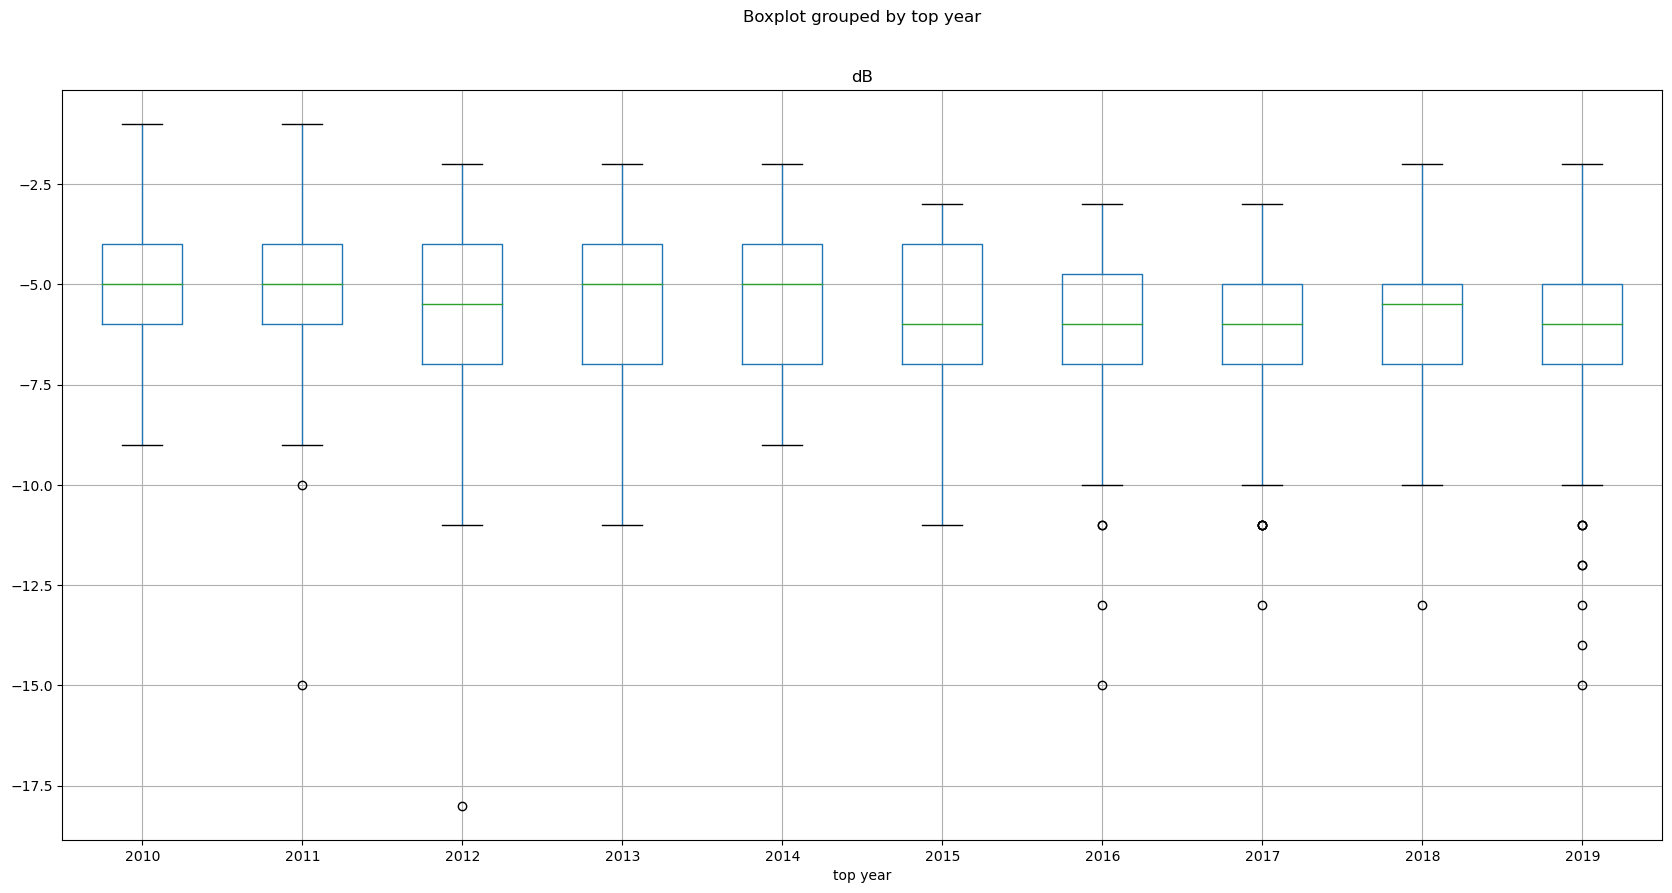

In [28]:
tracks_2010s_df.boxplot("dB", by="top year", figsize=(20, 10))
group0 = tracks_2010s_df[tracks_2010s_df["top year"] == 2010]["dB"]
group1 = tracks_2010s_df[tracks_2010s_df["top year"] == 2011]["dB"]
group2 = tracks_2010s_df[tracks_2010s_df["top year"] == 2012]["dB"]
group3 = tracks_2010s_df[tracks_2010s_df["top year"] == 2013]["dB"]
group4 = tracks_2010s_df[tracks_2010s_df["top year"] == 2014]["dB"]
group5 = tracks_2010s_df[tracks_2010s_df["top year"] == 2015]["dB"]
group6 = tracks_2010s_df[tracks_2010s_df["top year"] == 2016]["dB"]
group7 = tracks_2010s_df[tracks_2010s_df["top year"] == 2017]["dB"]
group8 = tracks_2010s_df[tracks_2010s_df["top year"] == 2018]["dB"]
group9 = tracks_2010s_df[tracks_2010s_df["top year"] == 2019]["dB"]
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

In [29]:
#Assuming a standard cut off at 5%, we can see with this low p-value that there is a statistically relevant correlation with loudness throughout the 2010s.

F_onewayResult(statistic=2.763628112757467, pvalue=0.0033813293968774933)

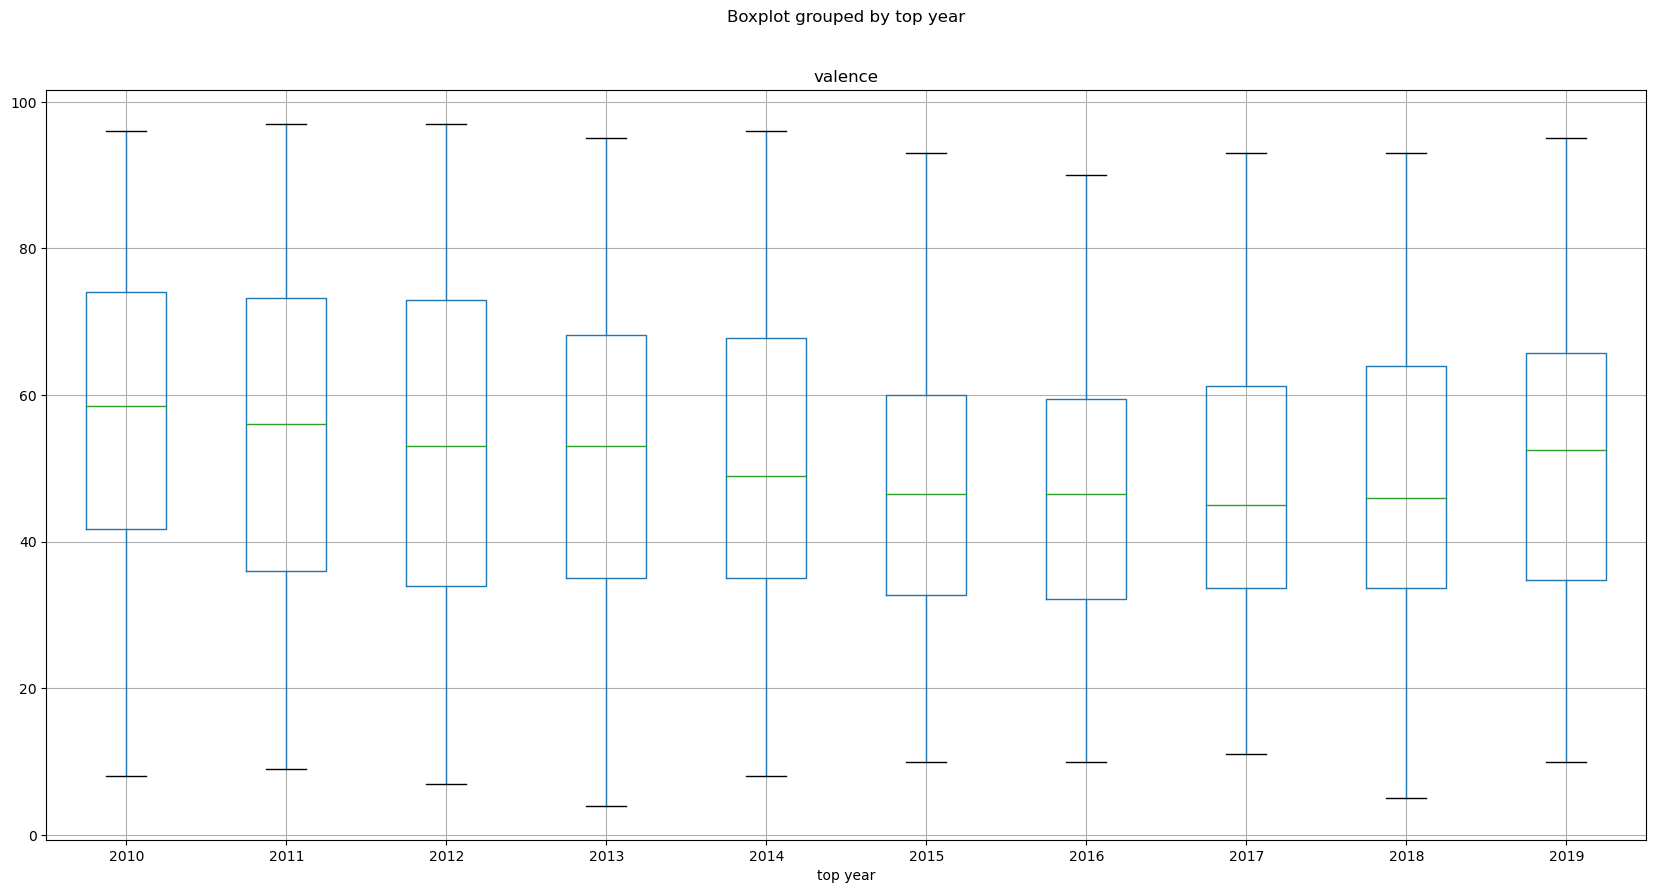

In [31]:
tracks_2010s_df.boxplot("valence", by="top year", figsize=(20, 10))
group0 = tracks_2010s_df[tracks_2010s_df["top year"] == 2010]["valence"]
group1 = tracks_2010s_df[tracks_2010s_df["top year"] == 2011]["valence"]
group2 = tracks_2010s_df[tracks_2010s_df["top year"] == 2012]["valence"]
group3 = tracks_2010s_df[tracks_2010s_df["top year"] == 2013]["valence"]
group4 = tracks_2010s_df[tracks_2010s_df["top year"] == 2014]["valence"]
group5 = tracks_2010s_df[tracks_2010s_df["top year"] == 2015]["valence"]
group6 = tracks_2010s_df[tracks_2010s_df["top year"] == 2016]["valence"]
group7 = tracks_2010s_df[tracks_2010s_df["top year"] == 2017]["valence"]
group8 = tracks_2010s_df[tracks_2010s_df["top year"] == 2018]["valence"]
group9 = tracks_2010s_df[tracks_2010s_df["top year"] == 2019]["valence"]
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

In [32]:
#Assuming a standard cut off at 5%, we can see with this ~.3% p-value that there is a statistically relevant correlation with valence throughout the 2010s.

F_onewayResult(statistic=4.285349209023469, pvalue=1.7655614811992484e-05)

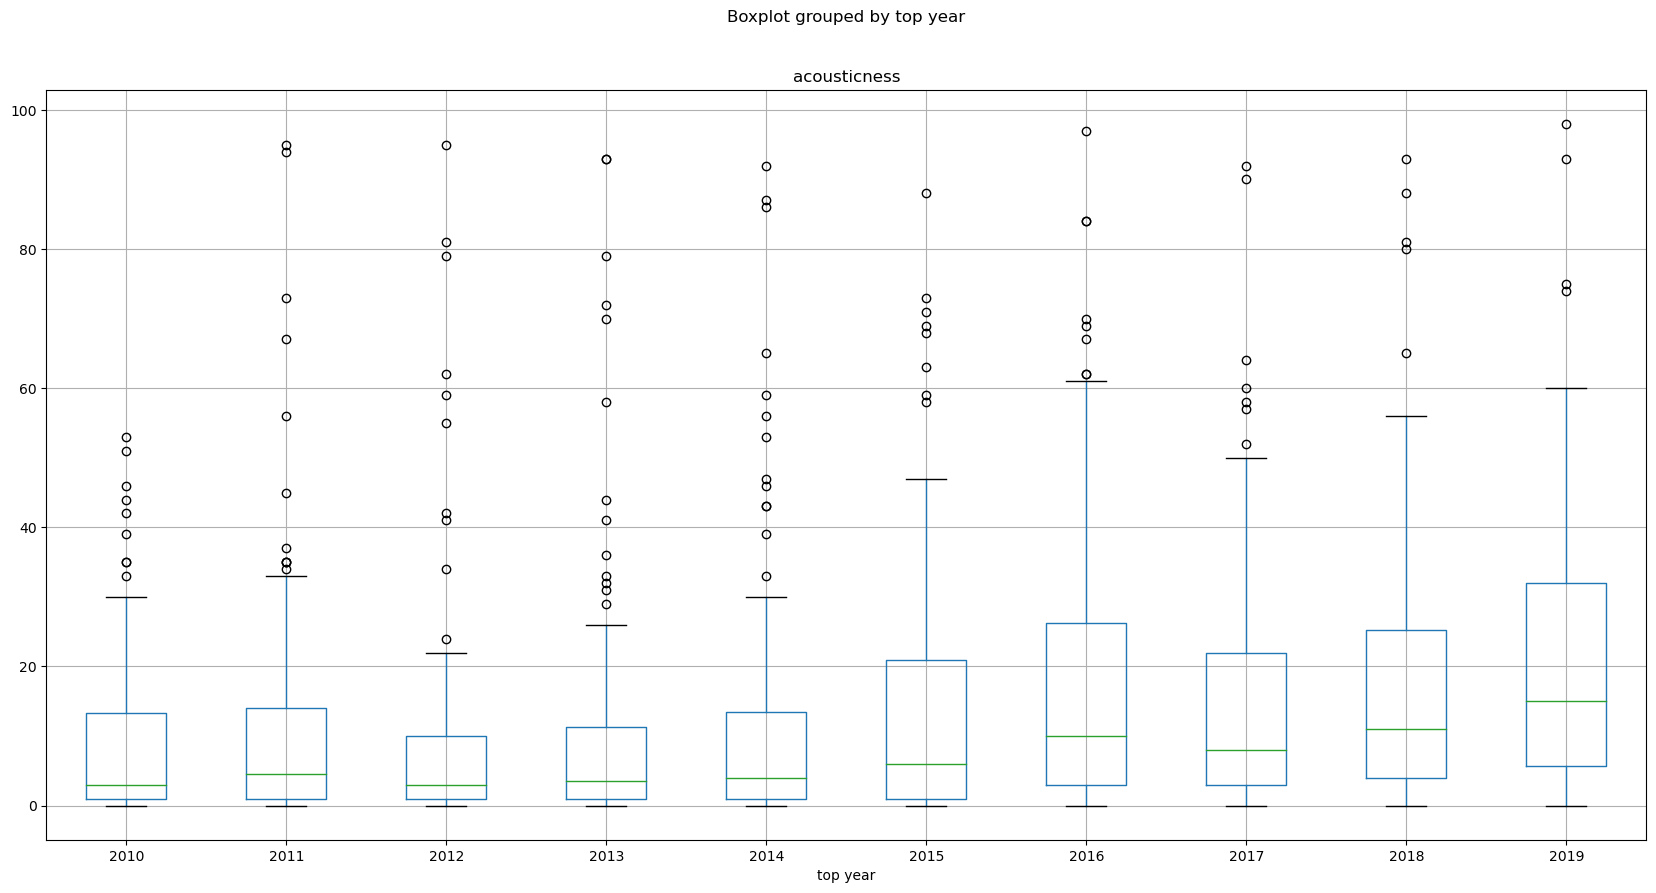

In [33]:
tracks_2010s_df.boxplot("acousticness", by="top year", figsize=(20, 10))
group0 = tracks_2010s_df[tracks_2010s_df["top year"] == 2010]["acousticness"]
group1 = tracks_2010s_df[tracks_2010s_df["top year"] == 2011]["acousticness"]
group2 = tracks_2010s_df[tracks_2010s_df["top year"] == 2012]["acousticness"]
group3 = tracks_2010s_df[tracks_2010s_df["top year"] == 2013]["acousticness"]
group4 = tracks_2010s_df[tracks_2010s_df["top year"] == 2014]["acousticness"]
group5 = tracks_2010s_df[tracks_2010s_df["top year"] == 2015]["acousticness"]
group6 = tracks_2010s_df[tracks_2010s_df["top year"] == 2016]["acousticness"]
group7 = tracks_2010s_df[tracks_2010s_df["top year"] == 2017]["acousticness"]
group8 = tracks_2010s_df[tracks_2010s_df["top year"] == 2018]["acousticness"]
group9 = tracks_2010s_df[tracks_2010s_df["top year"] == 2019]["acousticness"]
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

In [34]:
#Assuming a standard cut off at 5%, we can see with thi low p-value that there is a statistically relevant correlation with valence throughout the 2010s.
